In [1]:
from IPython.core.display import HTML
from string import Template
def jsConfig():
    src = """
    <script>require.config({ baseUrl: 'https://rawgit.com/kompgraf/course-material/master/assets/' });</script>
    """
    return HTML(src)
def addScript(script, identifier):
    src = Template("""
    <div id="${identifier}-container"></div>
    <script>require(['${script}'], main => main($$("#${identifier}-container"), '${identifier}'));</script>
    """)
    return HTML(src.substitute(script = script, identifier = identifier))
jsConfig()


# Duál subdivision-felületek

## Bevezetés

A primál subdivision-felületek megvizsgálása után ismerkedjünk meg röviden a duál felületekkel is! Az ezen az elven alapuló sémák kevésbé használatosak, de legalább annyira érdekesek, mint primál társaik. Természetesen az elvárásaink is hasonlóak, azaz hatékonyan és egyszerűen szeretnénk sima mesheket generálni.

Ebben a jegyzetben az egyik legelső duál subdivision-módszert, a Doo-Sabin eljárást fogjuk szemügyre venni. 

## A duál subdivision-elv

Míg a Catmull-Clark vagy a Loop subdivision esetén a lapokat daraboltuk fel az egyes iterációk során, addig a duál subdivision-módszerek a csúcsokat fogják szétdarabolni. Tehát minden csúcsból generálunk $n$ darab másik csúcsok. Minden eredeti csúcshoz így egy fa fog tartozni, melynek egyes szintjein az egymást követő iterációk által képzett csúcsok állnak. 

Lényegében pontosan ugyanaz történik, mint a primál subdivision esetén, csak nem lapokkal, hanem csúcsokkal. Ezt szemlélteti a következő ábra is, mely a két megközelítés közti különbséget mutatja be.

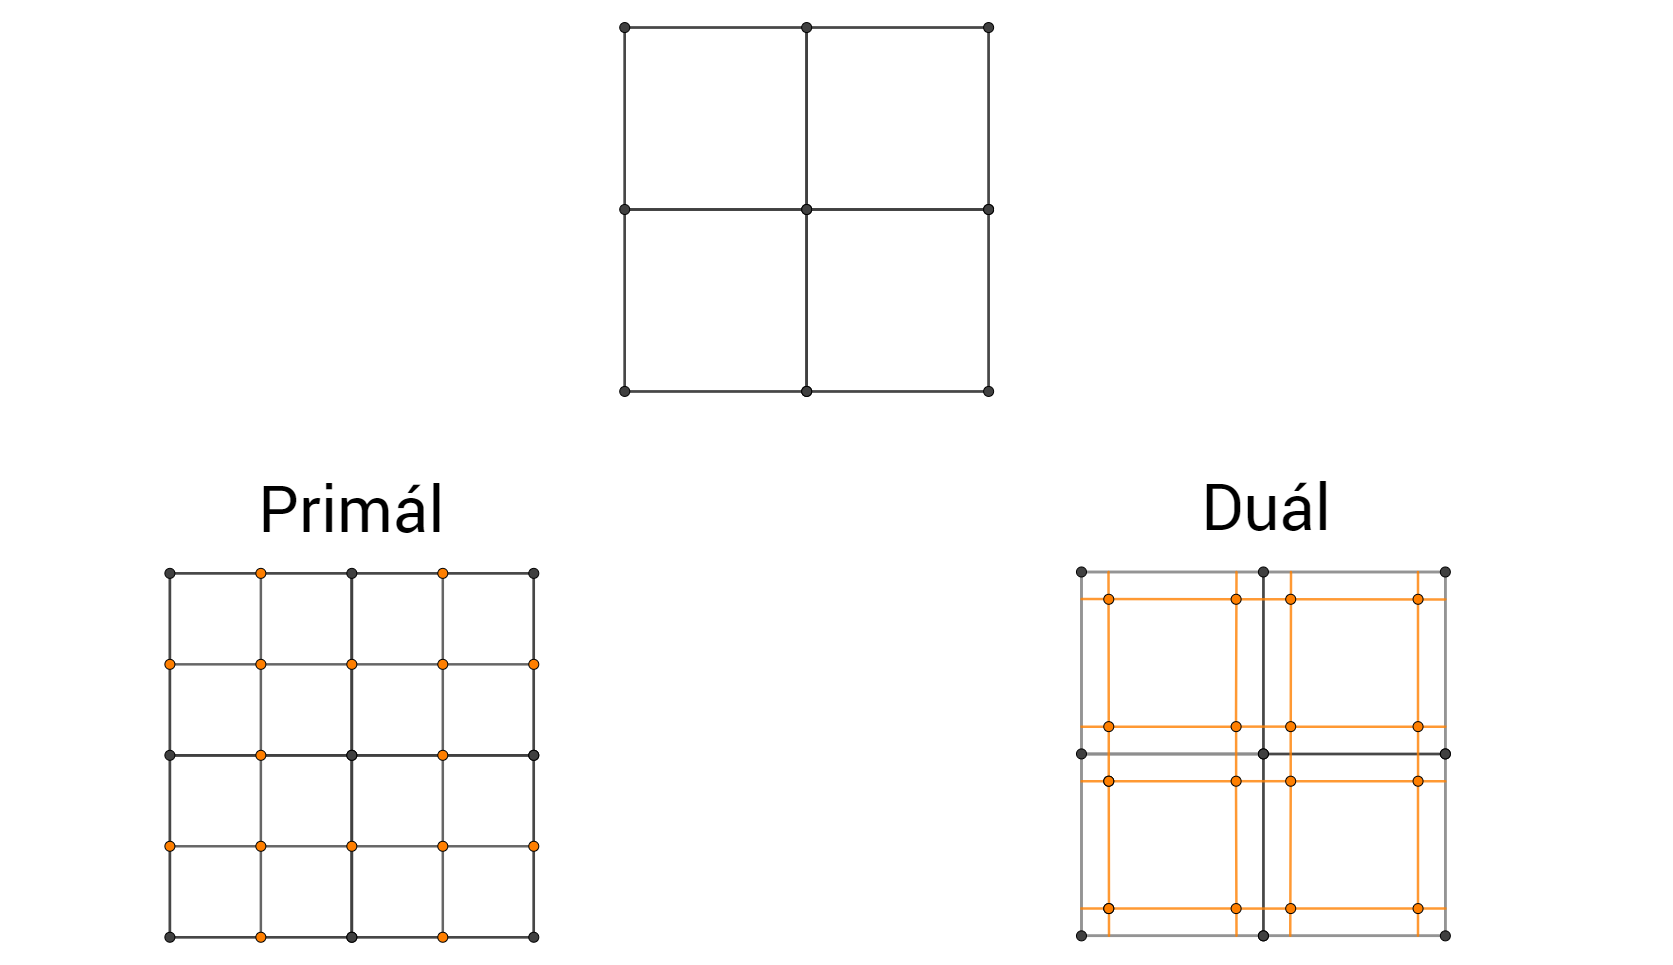

Míg a primál esetben megtartottuk az eredeti csúcsokat (legfeljebb a pozíciójukat módosítottuk), és a meglevő lapokat daraboltuk fel, addig a duál módszer esetén teljesen eldobtuka régi csúcsokat és lapokat. Kizárólag a naracssárgával jelölt csúcsokat és éleket tartjuk meg, és használjuk fel majd a következő finomítás srorán.

## Doo-Sabin subdivision

A Doo-Sabin subdivision egy rendkívül egyszerű, úgynevezett *corner cutting* séma. Minden csúcs annyi új csúcsot fog generálni, amennyi a fokszáma (azaz a befutó éleinek száma). Az új csúcsok pozíciójának meghatározása a következőképpen történik:

  1. Válasszunk ki egy $e$ élt, amely $v$-be fut, és legyen ennek a felezőpontja $f$! Jelöljük továbbáő $e^{\prime}$-vel a $v$-be befutó élek közül az óramutató járása szerinti következőt, melynek a felezőpontja legyen $f^{\prime}$.
  1. Határozzuk meg az $e$ és $e^{\prime}$ élek által határolt lap súlypontját. Jelöljük ezt a pontot $s$-sel.
  1. Az új $u$ csúcs pozíciója a következő képlettel számolható:
  $$
  u = \frac{1}{4} (v + f + f^{\prime} + s)
  $$

Ismételjük meg az előző lépéseket a $v$ csúcsba befutó összes $e$ élre! Az ábrán mind az új csúcsot, mind az annak előállításában részt vevő csúcsokat megvizsgálhatjuk.

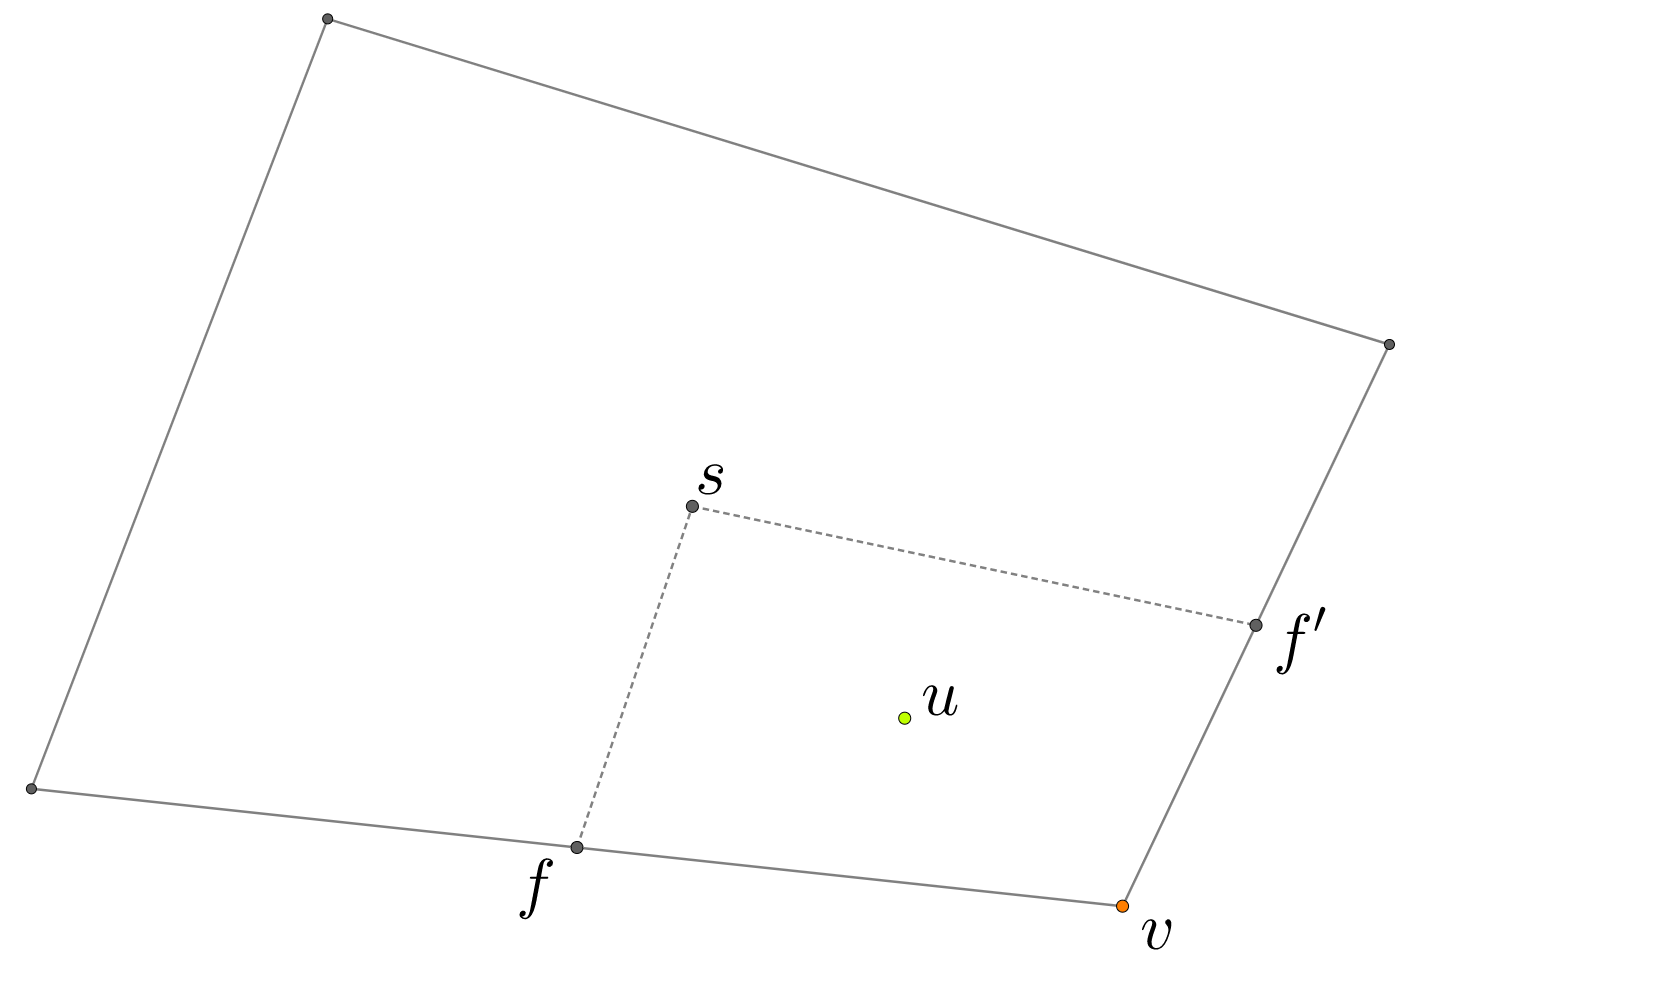


Miután az összes csúcson végigiteráltunk, egyszerűen összekötjük az újonnan kapott csúcsokat azokkal a csúcsokkal, melyeket az eredeti csúcs valamelyik szomszédjából generáltunk. Például egy kocka esetén a következő ábrának megfelelő lapokat fogjuk kapni.

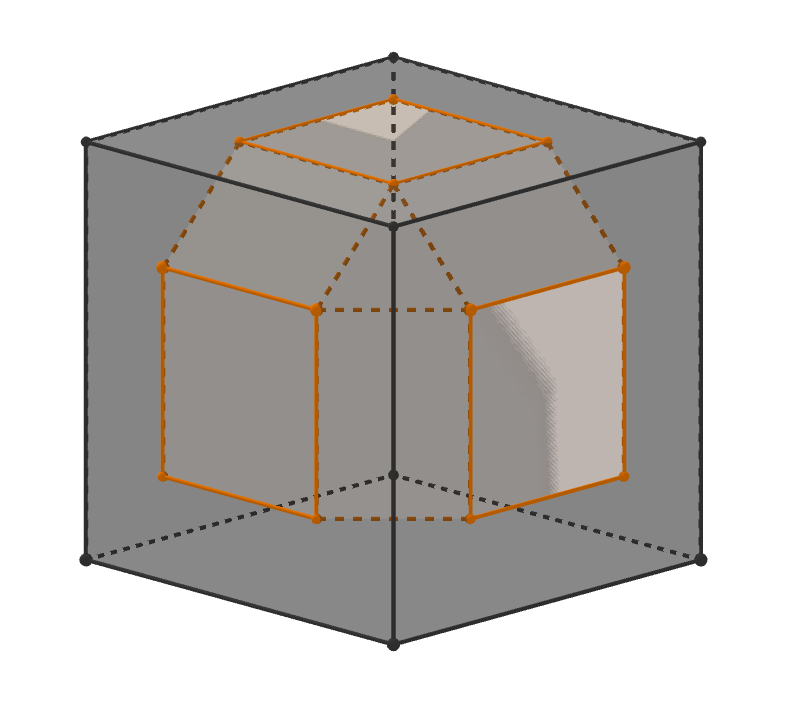

Részletesebbe szemügyre véve, láthatjuk, hogy háromféle lap keletkezik.

  * **F-face** - Egy régi lapot felépítő csúcsok és élek által generált új csúcsok összekötésével kapjuk. Mindig annyi csúcsból fog állni, amennyiből az eredeti lap is állt.
  * **V-face** - Egy régi csúcs által generált új csúcsok összekötésével áll elő. Annyi csúcs alkotja, ahány befutó éllel rendelkezett a régi csúcs.
  * **E-face** - Azon csúcsok összekötésével kapjuk, melyek az adott él részvételével jöttek létre. Ilyenből mindig négy van, tehát négyszög fog létrejönni.

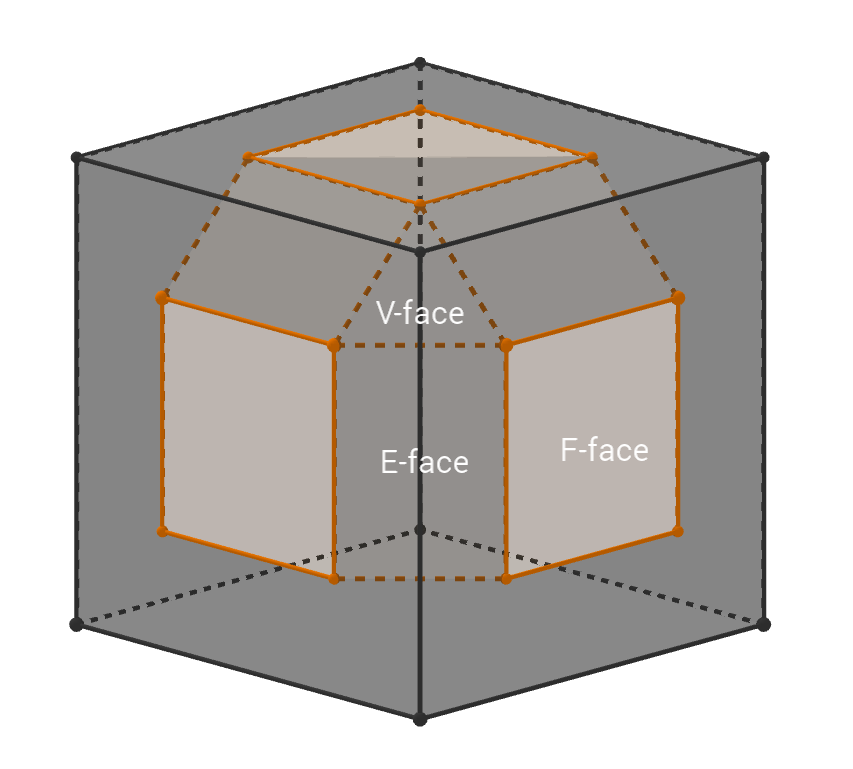

### Demonstráció

A demonstráció a Doo-Sabin subdivision-eljárás segítségével finomít egy kockát. A következő iterációt az <kbd>ENTER</kbd> billentyű leütésével tudjuk végrehajtani.

In [3]:
addScript("js/doo-sabin-subdivision", "doo-sabin-subdivision")

## Források

  * K. Joy (2002). *Doo-Sabin Surfaces* https://www.cs.unc.edu/~dm/UNC/COMP258/LECTURES/Doo-Sabin.pdf
  * C.-K. Shene (2010). *Subdivision Techniques* https://pages.mtu.edu/~shene/COURSES/cs3621/SLIDES/Subdivision.pdf

In [2]:
def styling():
    styles = open("../../styles/custom.html", "r").read()
    return HTML(styles)
styling()
